In [28]:
%matplotlib inline 

import os
import glob
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from skimage import io 
import subprocess as sp
# import geopandas as gdp
# from PIL import Image #Pillow
import matplotlib
import matplotlib.pyplot as plt
# import imageio
# import visvis as vv

## ASO lidar data (2013-2018)

### Import data

In [29]:
basepath = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/{}/*.tif'
start = 2013
end = 2018

endTest= 2014


for year in range(start, endTest):#end+1
    flist = glob.glob(basepath.format(year))
#     print(flist)
    for f in sorted(flist):
        print(f)
        
        break   

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/2013/TB20130403_SUPERsnow_depth_3p0m.tif


### Raster to numpy array

/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


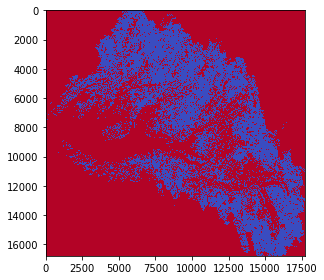

raster shape (16780, 17699)
array shape (16780, 17699)


In [39]:
        # read tif
        raster = io.imread(f)
        ix = raster<=0
        raster[ix]=np.nan
        io.imshow(raster>=0 , cmap='coolwarm' + "_r") 
        io.show()
        print("raster shape",raster.shape)
        
        # convert to numpy array
        array = np.array(raster)
        print("array shape",array.shape)

        
# # #goal
#         raster = Image.open(f) #('f') NEED SOME QUOTES in f...
#         raster.show()
#         array = np.array(raster)
#         print(array.shape)

### Snow Covered Area

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


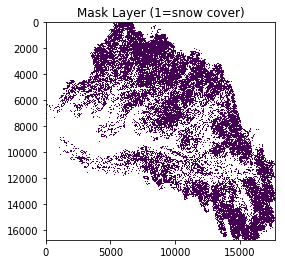

In [42]:
#copy array
a = array.copy()
print(a)

#mask SCA (boolean)
a[a > 0] = 1 #make SCA mask
plt.imshow(a)
plt.title('Mask Layer (1=snow cover)')
plt.show()



In [ ]:


#clip to Tuolumne shapefile
shp = '/home/meganmason/Documents/projects/thesis/maps/map_layers/tuolumne_delineation/corrected_tuolumne_subbasin.shp'


df1 = #lidar data
df2 = #Tuolumne shapefile

slp = gpd.overlay(df1, df2, how='intersection')

In [ ]:
#shapefile to clip with
#/home/meganmason/Documents/projects/thesis/maps/map_layers/tuolumne_delineation/corrected_tuolumne_subbasin.shp